#Tugas Lab 1
Nama: Muhammad Nur Aziz

Kelas: 3F

NIM: 2341720237

1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.

2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?

3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai
k
k yang terbaik? Lampirkan grafika analisis dan alasan Anda.

In [20]:
from IPython.display import clear_output
!pip install gdown
clear_output()
!gdown --id "1Bd5zy6LVT7IKrdl4O2SHGFreYa0IAWjA"

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Bd5zy6LVT7IKrdl4O2SHGFreYa0IAWjA
To: /content/voice.csv
100% 1.07M/1.07M [00:00<00:00, 9.06MB/s]


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [22]:
# Load data
data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


#1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [24]:
data.describe()
data['label'].value_counts()

,count
label,
male,1584
female,1584


In [25]:
X = data.drop('label', axis=1)
y = data['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [26]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn1.predict(X_test)
print("MODEL kNN")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=['female', 'male']))

MODEL kNN
Akurasi: 0.9763
              precision    recall  f1-score   support

      female       0.99      0.97      0.98       317
        male       0.97      0.99      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



#2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?

In [28]:
le = LabelEncoder()
data['label_encoded'] = le.fit_transform(data['label'])
data_numeric = data.drop('label', axis=1)
correlation_with_target = data_numeric.corr()['label_encoded'].abs().sort_values(ascending=False)

print("Korelasi fitur terbaik dengan label:")
print(correlation_with_target[1:11])


Korelasi fitur terbaik dengan label:
meanfun     0.833921
IQR         0.618916
Q25         0.511455
sp.ent      0.490552
sd          0.479539
sfm         0.357499
meanfreq    0.337415
centroid    0.337415
median      0.283919
maxdom      0.195657
Name: label_encoded, dtype: float64


In [29]:
selected_features = correlation_with_target.index[1:11].tolist()

In [30]:
# selected_features = [
#     'meanfun', 'IQR', 'Q25', 'sp.ent', 'sd', 'sfm', 'meanfreq', 'centroid', 'median', 'maxdom'
# ]

In [31]:
X_selected = data[selected_features]
y = data['label_encoded']

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai k yang terbaik? Lampirkan grafika analisis dan alasan Anda.

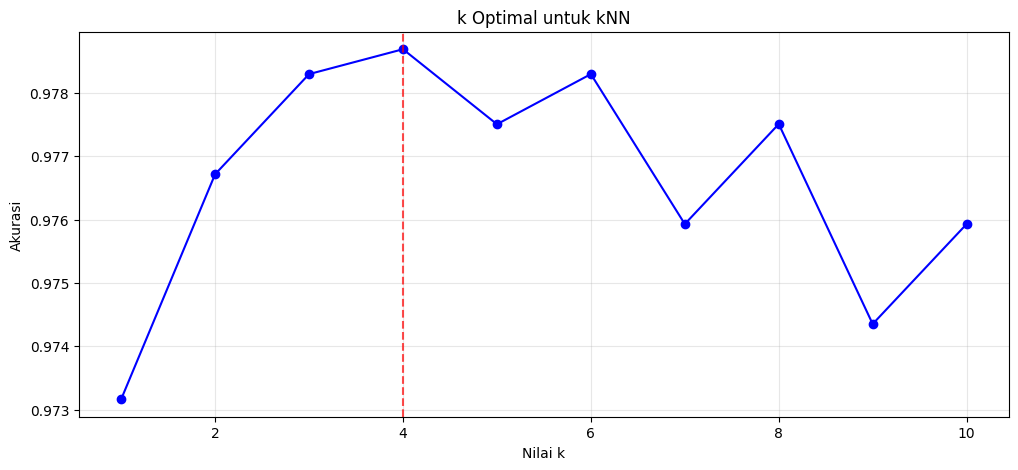

Nilai k terbaik: 4
Akurasi: 0.9787


In [32]:
k_range = range(1, 11)
k_scores = []
for k in k_range:
  # model knn
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

plt.figure(figsize=(12, 5))
plt.plot(k_range, k_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.title('k Optimal untuk kNN')
plt.grid(True, alpha=0.3)

# nilai k terbaik
best_k = k_range[np.argmax(k_scores)]
best_score = max(k_scores)
plt.axvline(x=best_k, color='r', linestyle='--', alpha=0.7)
plt.show()

print(f"Nilai k terbaik: {best_k}")
print(f"Akurasi: {best_score:.4f}")

berdasarkan grafiknya, nilai terbaik untuk k adalah 4 karena memberikan nilai akurasi tertinggi dibandingkan dengan yang lain